In [5]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin';os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
import pylab
import calendar
from scipy import stats
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import  preprocessing, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, log_loss


In [6]:
pd.set_option('display.max_colwidth', -1)

In [7]:
train_df = pd.read_csv("E:/GA_TECH_DataMining/project/train.csv")

In [8]:
test_df = pd.read_csv("E:/GA_TECH_DataMining/project/test.csv")

Select Final List of Features/Predictors in Training Dataset

In [22]:
X = train_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','weekday_created','hour_of_day_created','list_per_mgr','dec_len','Pets_Allowed','Hardwood','No_fee','Parking','Storage','Sunlight','Laundry_Room','Wash_Dry','Prewar','AirCon']]
X.index = train_df['listing_id']


Create Training Labels(convert high, medium and low to numeric form)

In [ ]:
target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))

Select Final List of Features/Predictors on Test Dataset

In [23]:
Xtest = test_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','weekday_created','hour_of_day_created','list_per_mgr','dec_len','Pets_Allowed','Hardwood','No_fee','Parking','Storage','Sunlight','Laundry_Room','Wash_Dry','Prewar','AirCon']]
Xtest.index = test_df['listing_id']


Cross Validate

In [24]:
dtrain = xgb.DMatrix(data=X, label=train_y)
params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':'0.01','max_depth':'4','max_delta_step':'1',
            'min_child_weight':100}
 
print ('running cross validation')
xcv =xgb.cv(params,dtrain, num_boost_round=1000,seed = 7,folds=10, early_stopping_rounds=3)
xcv


running cross validation


,test-mlogloss-mean,test-mlogloss-std,train-mlogloss-mean,train-mlogloss-std
0,1.093331,0.000040,1.093303,0.000029
1,1.088106,0.000082,1.088048,0.000061
2,1.082955,0.000096,1.082870,0.000065
3,1.077841,0.000143,1.077726,0.000103
4,1.072822,0.000151,1.072679,0.000096
5,1.067835,0.000177,1.067662,0.000115
6,1.062921,0.000183,1.062721,0.000107
7,1.058075,0.000188,1.057849,0.000095
8,1.053267,0.000215,1.053011,0.000111
9,1.048523,0.000216,1.048241,0.000098


Train the model

In [26]:
train_params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':0.01,'max_depth':'4','max_delta_step':'1','early_stopping_rounds':'3','min_child_weight':'100'}
final_gb = xgb.train(train_params,dtrain,num_boost_round=1000)


Plot Feature Importance

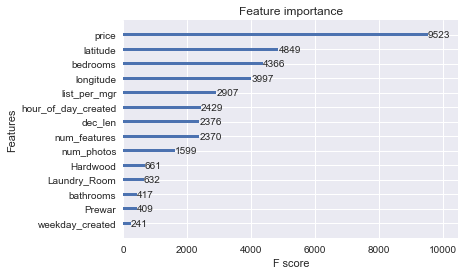

In [27]:
xgb.plot_importance(final_gb)

Plot Learning Curves

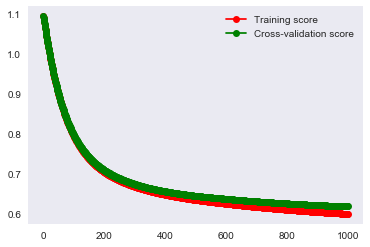

In [28]:
plt.grid()
plt.plot(xcv.index, xcv['train-mlogloss-mean'], 'o-', color="r",
         label="Training score")
plt.plot(xcv.index, xcv['test-mlogloss-mean'], 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Score Test Data

In [29]:
preds1 = final_gb.predict(xgb.DMatrix(data=Xtest))

Create Final submission.csv file

In [30]:
predsf = pd.DataFrame(preds1)
cols = ['high', 'medium', 'low']
predsf.columns = cols
predsf['listing_id'] = Xtest.index
predsf.to_csv('E:/rentalProject/submission.csv', index=None)
